In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading DataSet...


In [ ]:
data = pd.read_excel("Concrete_Data.xls")

In [ ]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

**Observations:**
1. Different Features have different units. Thus all the features must be converted to non-dimensional quantitites for effective interpretation of caluclated weights in Linear Regression. Min-Max scaling(sklearn.preprocessing.MinMaxScaler) might be the simplest form of scaling to convert all feature values to dimensionaless quantities . StandardScalar can also be used to make the features dimensionless

**Task at Hand:**
1. Identify multi collinearity between features
2. Identify important features( Feature extraction)
3. Split the data to train and test set - sklearn.model_selection.train_test_split.

Based on instructions given in class, steps 1 and 2 are not being explored for this assignment. In general, statistical techniques like Variance inflation Factor and  ANOVA test can be use to identify multicollinearity and obtain important features


1. Divide the dataset into Training, Test datasets using a
70:30 ratio.

In [ ]:
# Split data to train and test
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Concrete compressive strength(MPa, megapascals) '],axis = 1)
y = data['Concrete compressive strength(MPa, megapascals) ']

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.3) #train size = 70% and test size = 30%

In [ ]:
train = X_train.copy(deep = True)
train['Concrete compressive strength(MPa, megapascals) '] = Y_train

test = X_test.copy(deep = True)
test['Concrete compressive strength(MPa, megapascals) '] = Y_test

**Using MinMax scaler to make the features dimensionless:**

Now let us make use of MinMax scaler to make the features dimensionless




In [ ]:
#Using MinMaxScaler to transpose the features to a dimensionless form

from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
#Transform X_train
train_scaled = pd.DataFrame(scaler.fit_transform(train), columns = train.columns)
#Transforming X_test
test_scaled = pd.DataFrame(scaler.transform(test), columns = test.columns)

**Model building**

2. Obtain a linear regression fit for predicting the compressive strength from
fitting the linear regression model on just the Training dataset.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#train data is X_train_scaled
X_train_scaled = train_scaled.drop(columns=['Concrete compressive strength(MPa, megapascals) '],axis = 1)
Y_train_scaled = train_scaled['Concrete compressive strength(MPa, megapascals) ']
model = LinearRegression()
model.fit(X_train_scaled,Y_train_scaled)


LinearRegression()

**Determining the co-efficent of determination for train and test data**

In [ ]:
#co-efficent of determination on train data
model.score(X_train_scaled,Y_train_scaled)

0.6152930223514669

In [ ]:
X_test_scaled = test_scaled.drop(columns=['Concrete compressive strength(MPa, megapascals) '],axis = 1)
Y_test_scaled = test_scaled['Concrete compressive strength(MPa, megapascals) ']

In [ ]:
#co-efficent of determination on test data
model.score(X_test_scaled,Y_test_scaled)

0.6080017936179676

We have the output in the range [0-1], thus we have to convert the output to obtain the original prediction that is returned by the model by performing inverse transform.

4. **Obtain the following values.**

  a. Mean Squared error and R-squared value for training data and test
data respectively.

  b. Plot the scatter plot for y_true against y_predicted
for training and test data
respectively.


In [ ]:
# Performing inverse transform to obtain the predictions with units (MPa) on test data
Y_pred_scaled = model.predict(X_test_scaled)
temp_df = X_test_scaled.copy(deep = True)
temp_df['Concrete compressive strength(MPa, megapascals) '] = Y_pred_scaled
temp_df = pd.DataFrame(scaler.inverse_transform(temp_df),columns = temp_df.columns)
Y_pred = temp_df['Concrete compressive strength(MPa, megapascals) ']

# Performing inverse transform to obtain the predictions with units (MPa) on test data

Y_pred_scaled = model.predict(X_train_scaled)
temp_df = X_train_scaled.copy(deep = True)
temp_df['Concrete compressive strength(MPa, megapascals) '] = Y_pred_scaled
temp_df = pd.DataFrame(scaler.inverse_transform(temp_df),columns = temp_df.columns)
Y_train_pred = temp_df['Concrete compressive strength(MPa, megapascals) ']

Evaluating R-squared and mean squared error for train and test data

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#We train Y_train, Y_test, Y_train_pred,Y_pred
a = np.zeros([2,2])
a[0,0] = mean_squared_error(Y_train,Y_train_pred)
a[0,1] = r2_score(Y_train,Y_train_pred)
a[1,0] = mean_squared_error(Y_test,Y_pred)
a[1,1] = r2_score(Y_test,Y_pred)

table = pd.DataFrame(a,columns =['mean squared error(in (MPa*MPa))', 'r2 score'],index = ['train data','test data'])
table

,mean squared error(in (MPa*MPa)),r2 score
train data,102.421293,0.615293
test data,120.744120,0.608002


Data Visualization:

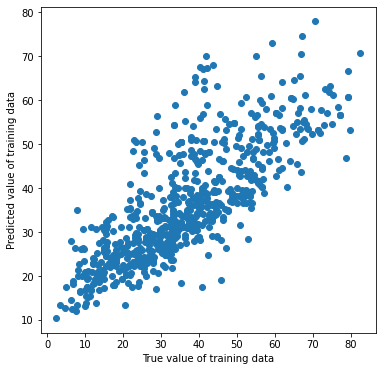

In [ ]:
#y_true vs y_pred for training data
plt.figure(figsize=(6,6))
plt.scatter(Y_train,Y_train_pred)
plt.xlabel("True value of training data")
plt.ylabel("Predicted value of training data")
plt.show()

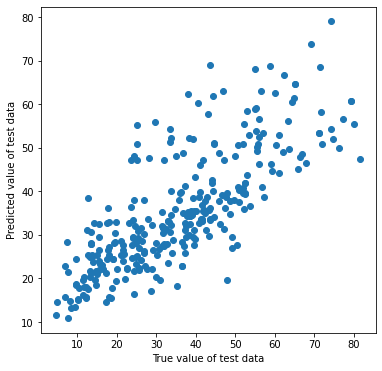

In [ ]:
#y_true vs y_pred for test data
plt.figure(figsize=(6,6))
plt.scatter(Y_test,Y_pred)
plt.xlabel("True value of test data")
plt.ylabel("Predicted value of test data")
plt.show()

**Using standard scaler to make the features dimensionless:**  
Now let us make use of Standard scaler to convert make the features dimensionless

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler= StandardScaler()
#Transform X_train
train_scaled = pd.DataFrame(std_scaler.fit_transform(train), columns = train.columns)
#Transforming X_test
test_scaled = pd.DataFrame(std_scaler.transform(test), columns = test.columns)

**Model building**

2. Obtain a linear regression fit for predicting the compressive strength from
fitting the linear regression model on just the Training dataset.

In [ ]:
#train data is X_train_scaled
X_train_scaled = train_scaled.drop(columns=['Concrete compressive strength(MPa, megapascals) '],axis = 1)
Y_train_scaled = train_scaled['Concrete compressive strength(MPa, megapascals) ']
model_std = LinearRegression()
model_std.fit(X_train_scaled,Y_train_scaled)

LinearRegression()

Determining co-efficient of determination on train and test data

In [ ]:
#co-efficent of determination on train data
model_std.score(X_train_scaled,Y_train_scaled)

0.6152930223514669

In [ ]:
X_test_scaled = test_scaled.drop(columns=['Concrete compressive strength(MPa, megapascals) '],axis = 1)
Y_test_scaled = test_scaled['Concrete compressive strength(MPa, megapascals) ']

In [ ]:
#co-efficent of determination on test data
model_std.score(X_test_scaled,Y_test_scaled)

0.6080017936179678

4. **Obtain the following values.**

  a. Mean Squared error and R-squared value for training data and test
data respectively.

  b. Plot the scatter plot for y_true against y_predicted
for training and test data
respectively.


In [ ]:
# Performing inverse transform to obtain the predictions with units (MPa) on test data
Y_pred_scaled = model_std.predict(X_test_scaled)
temp_df = X_test_scaled.copy(deep = True)
temp_df['Concrete compressive strength(MPa, megapascals) '] = Y_pred_scaled
temp_df = pd.DataFrame(std_scaler.inverse_transform(temp_df),columns = temp_df.columns)
Y_pred = temp_df['Concrete compressive strength(MPa, megapascals) ']

# Performing inverse transform to obtain the predictions with units (MPa) on test data

Y_pred_scaled = model_std.predict(X_train_scaled)
temp_df = X_train_scaled.copy(deep = True)
temp_df['Concrete compressive strength(MPa, megapascals) '] = Y_pred_scaled
temp_df = pd.DataFrame(std_scaler.inverse_transform(temp_df),columns = temp_df.columns)
Y_train_pred = temp_df['Concrete compressive strength(MPa, megapascals) ']

Evaluating R-squared and mean squared error for train and test data

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
Y_train = train['Concrete compressive strength(MPa, megapascals) ']
Y_test = test['Concrete compressive strength(MPa, megapascals) ']
#We train Y_train, Y_test, Y_train_pred,Y_pred
a = np.zeros([2,2])
a[0,0] = mean_squared_error(Y_train,Y_train_pred)
a[0,1] = r2_score(Y_train,Y_train_pred)
a[1,0] = mean_squared_error(Y_test,Y_pred)
a[1,1] = r2_score(Y_test,Y_pred)

table = pd.DataFrame(a,columns =['mean squared error(in (MPa*MPa))', 'r2 score'],index = ['train data','test data'])
table

,mean squared error(in (MPa*MPa)),r2 score
train data,102.421293,0.615293
test data,120.744120,0.608002


Data Visualization

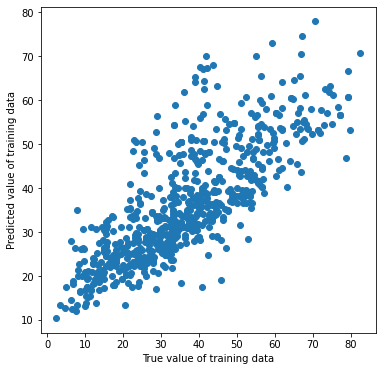

In [ ]:
#y_true vs y_pred for training data
plt.figure(figsize=(6,6))
plt.scatter(Y_train,Y_train_pred)
plt.xlabel("True value of training data")
plt.ylabel("Predicted value of training data")
plt.show()

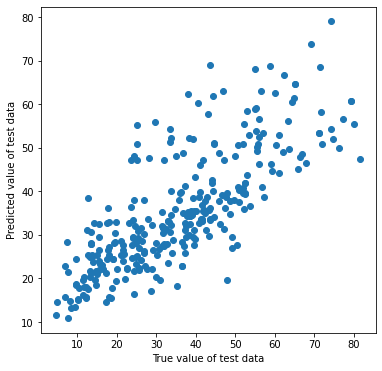

In [ ]:
#y_true vs y_pred for test data
plt.figure(figsize=(6,6))
plt.scatter(Y_test,Y_pred)
plt.xlabel("True value of test data")
plt.ylabel("Predicted value of test data")
plt.show()

**Observations:**
1. Both MinMax scaler and StandardScaler gave similar results
2. The output variable is moderately correlated with the given predictors. This is evident from the obtained r2 score value(between 0.5-0.8)
3. The value of various evaluation metrics for train and test data is given by:


||Mean Squared error (MSE)|Co-efficient of determination (R2 score) |
|:-------|:-------------------:|:----------:|
Train data|102.421293|0.615293|
Test data|120.744120|0.608002|

